# 5. Image Denoising with AutoEncoder

## 5.1 Basic Library

In [1]:
import numpy as np
import pandas as pd
import keras
import PIL
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 5.2 AutoEncoder

오토인코더의 개념은 기존의 신경망 모델과는 매우 다르다.

기존의 신경망 모델이 인풋레이어와 히든레이어를 통해 어떠한 결과값을 예측하기 위한 방식이었다면,

오토인코더는 입력레이어와 출력레이어를 최대한 동일하게 만드는 히든레이어를 찾기 위한 방식이다.

여기서 입력레이어는 인코더, 출력레이어는 디코더, 가운데 위치하는 레이어는 잠재표현이라고 하는 Latent Representation 이다.

인코더를 통해 입력벡터는 압축 표현되며, 이 압축 표현에서 디코더를 통해 복원이 된다.

## 5.3 Latent Representation

그렇다면 오토인코더를 사용하는 이유가 뭔가?! 아니 입력과 결과가 똑같은 애를 왜 쓰는가?

그것은 바로 잠재표현을 밝혀내기 위함이다.

압축된 잠재표현은 데이터의 가장 중요한 특징만을 남긴다.

예를 들어 고양이를 인코더에 넣었을 때 일부 특징만으로 디코더로 복원해 고양이를 나오게 할 수 있을까?

CNN모델에서 본 것처럼 전체를 보지 않고 특징만을 뽑아내더라도 충분히 가능할 것이다. 예를 들면 똥그란 눈, 세모 귀 모양, 수염 등등.

즉 오토인코더를 통해서 입력 데이터의 차원을 줄이거나,

입력 데이터의 노이즈를 제거할 수 있다. 댕꿀~

## 5.5 MNIST

이번 프로젝트는 딥러닝계의 Hello World 라고 불리는 MNIST 를 사용한다고 합니다. 케라스에 내장이 되어 있습니다. 댕꿀~

In [2]:
from keras.datasets import mnist

In [3]:
training_set, testing_set = mnist.load_data()
X_train, y_train= training_set
X_test, y_test =testing_set

11493376/11490434 [==============================] - 4s 0us/step


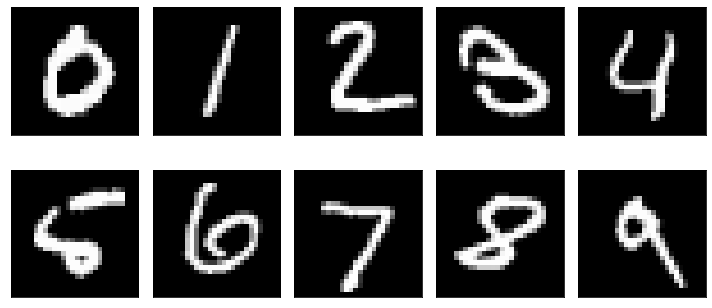

In [4]:
# 데이터를 한 번 살펴볼까요?
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break

plt.tight_layout()
plt.show()

## 5.6 Basic AutoEncoder

오토 인코더의 히든 레이어 조건은 다음과 같다.

- 입력의 특징을 압축해 표현할 수 있을 정도로 충분히 작아야 한다.
- 디코더가 큰 손실 없이 입력을 복원할 수 있을 정도로 충분히 커야 한다.

### 5.6.1 AutoEncoder with Keras

In [5]:
from keras.models import Sequential

In [6]:
# 일단 뼈대 구축하고.

model = Sequential()

In [7]:
from keras.layers import Dense

In [11]:
# 일단 히든 레이어 크기는 1로 하겠답니다.

hidden_layer_size = 1

In [17]:
# 입력 레이어 넣습니다.
model.add(Dense(hidden_layer_size, input_dim=784, activation='relu'))

# 출력 레이어는 시그모이드로 갑니다.
model.add(Dense(units=784, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 함수로 만들어놓으라고 합디다!

def create_basic_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=784, activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

model = create_basic_autoencoder(hidden_layer_size=1)

이제 데이터를 전처리하고 모델에 입력할 준비를 해야 한다. 다음 두 가지 작업이 필요하다.

- 입력 이미지를 구성하는 가로 28, 세로 28짜리 벡터를 가로 784, 세로 1짜리 벡터로 재구성한다.
- 0과 255사이인 벡터 내 요소 값을 0과 1사이 값으로 정규화 한다. 범위를 줄이면 신경망을 더 손쉽게 훈련시킬 수 있다.

In [20]:
# 일단 벡터를 플래튼 시키자.

X_train_reshaped = X_train.reshape((X_train.shape[0], # 데이터셋의 로우 개수
                                   X_train.shape[1]*X_train.shape[2])) # 가로 세로 벡터
X_test_reshaped = X_test.reshape((X_test.shape[0],
                                   X_test.shape[1]*X_test.shape[2]))

In [21]:
# 이제 정규화 하자.

X_train_reshaped = X_train_reshaped/255.
X_test_reshaped = X_test_reshaped/255.

In [22]:
# 컴파일 합니다.

model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# 학습합니다.

model.fit(X_train_reshaped, X_train_reshaped, epochs=10) # 입력과 출력에 모두 X_train_reshaped를 넣는다.

Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0749
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0653
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0641
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0635
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0632
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0629
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0624
Epoch 8/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0620
Epoch 9/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0616
Epoch 10/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0613


In [24]:
# 프리딕트 하자.

output = model.predict(X_test_reshaped)

결과 이미지를 화면에 나타내서 얼마나 비슷한지 확인해봅니다

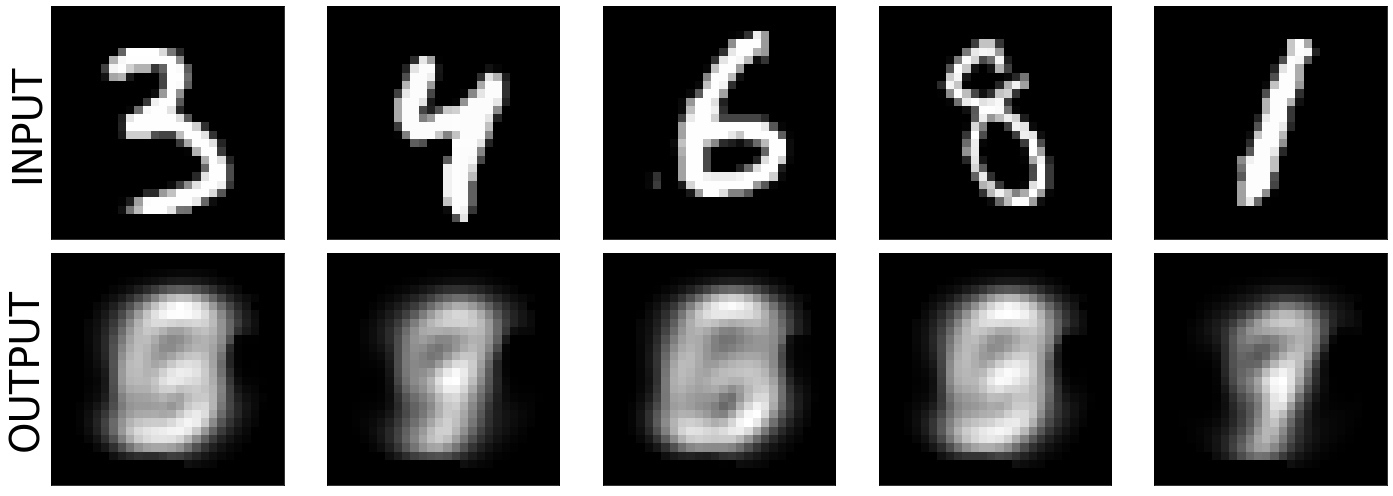

In [30]:
import random

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))

# 이미지 다섯 개를 무작위로 ㄹ고른다.
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 입력 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0:
        ax.set_ylabel("INPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("OUTPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
        
plt.tight_layout()
plt.show()

결과가 전혀 좋지 않습니다. 은닉 레이어 하나로는 전혀 특징을 잡아내지 못하는 것이죠.,

### 5.6.2 Effects with Hidden Layers of Performance

은닉 레이어를 두배씩 늘려가며 오토인코더를 만들어 성능을 비교해보겠습니다.

In [31]:
hidden_layer_size_2 = create_basic_autoencoder(hidden_layer_size=2)
hidden_layer_size_4 = create_basic_autoencoder(hidden_layer_size=4)
hidden_layer_size_8 = create_basic_autoencoder(hidden_layer_size=8)
hidden_layer_size_16 = create_basic_autoencoder(hidden_layer_size=16)
hidden_layer_size_32 = create_basic_autoencoder(hidden_layer_size=32)

In [32]:
hidden_layer_size_2.compile(optimizer='adam', loss='mean_squared_error')
hidden_layer_size_2.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0) # verbose는 훈련과정 출력 여부다.

hidden_layer_size_4.compile(optimizer='adam', loss='mean_squared_error')
hidden_layer_size_4.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_8.compile(optimizer='adam', loss='mean_squared_error')
hidden_layer_size_8.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_16.compile(optimizer='adam', loss='mean_squared_error')
hidden_layer_size_16.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hidden_layer_size_32.compile(optimizer='adam', loss='mean_squared_error')
hidden_layer_size_32.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

In [37]:
# 훈련이 너무 오래 걸렸다. 프리딕트 하자.

ouput_2 = hidden_layer_size_2.predict(X_test_reshaped)
ouput_4 = hidden_layer_size_4.predict(X_test_reshaped)
ouput_8 = hidden_layer_size_8.predict(X_test_reshaped)
ouput_16 = hidden_layer_size_16.predict(X_test_reshaped)
ouput_32 = hidden_layer_size_32.predict(X_test_reshaped)

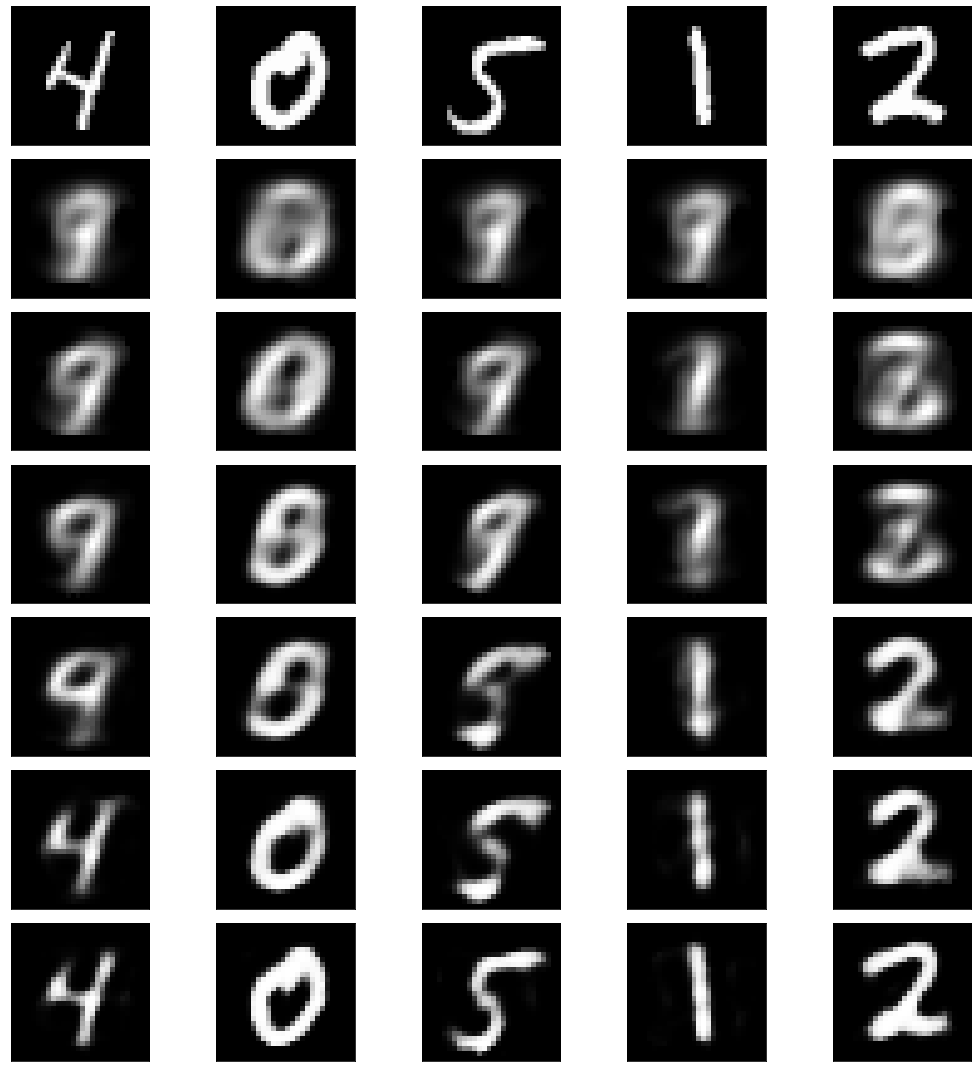

In [39]:
# 이미지 다섯 개를 무작위로 골라 각 모델에 입력한 결과를 비교해보자.

fig, axes = plt.subplots(7, 5, figsize=(15, 15))

randomly_selected_imgs = random.sample(range(output.shape[0]), 5)
outputs = [X_test, output, ouput_2, ouput_4, ouput_8, ouput_16, ouput_32]

for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28, 28), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
plt.tight_layout()
plt.show()

32개의 히든 레이어가 있는 모델에서 높은 성능을 보입니다!

## 5.7 Denoise with AutoEncoder

수년 전 오토인코더로 이미지 노이즈를 제거하는 방식이 제안됐다.

원리는 간단한데, 입력으로 노이즈 있는 이미지를 넣고, 출력으로 깨끗한 이미지를 넣어주는 것이다.

그러면 오토인코더는 노이즈를 제거하는 것을 학습하는 것이다.

학습 데이터를 만들기 위해 MNIST에 노이즈를 넣어보자.

In [40]:
# 각 픽셀에 무작위로 -0.5와 0.5 사이의 수를 더할 것이다.

X_train_noisy = X_train_reshaped + np.random.normal(0, 0.5, size=X_train_reshaped.shape)
X_test_noisy = X_test_reshaped + np.random.normal(0, 0.5, size=X_test_reshaped.shape)

In [41]:
# 노이즈를 더한 결과가 0~1 값을 벗어날 수 있으므로 다시 정규화 한다.

X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1) # 클립함수는 범위를 벗어나면 지정값으로 바꿔버린다.
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

In [42]:
# 기본 오토인코더를 생성한다.

basic_denoise_autoencoder = create_basic_autoencoder(hidden_layer_size=16)

In [43]:
# 컴파일하자..

basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# 학습하자.

basic_denoise_autoencoder.fit(X_train_noisy, X_train_reshaped, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0469
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0301
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0291
Epoch 4/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0289
Epoch 5/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0287
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0286
Epoch 7/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0285
Epoch 8/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0283
Epoch 9/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0282
Epoch 10/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0281


In [45]:
# 프리딕트 하자.

output = basic_denoise_autoencoder.predict(X_test_noisy)

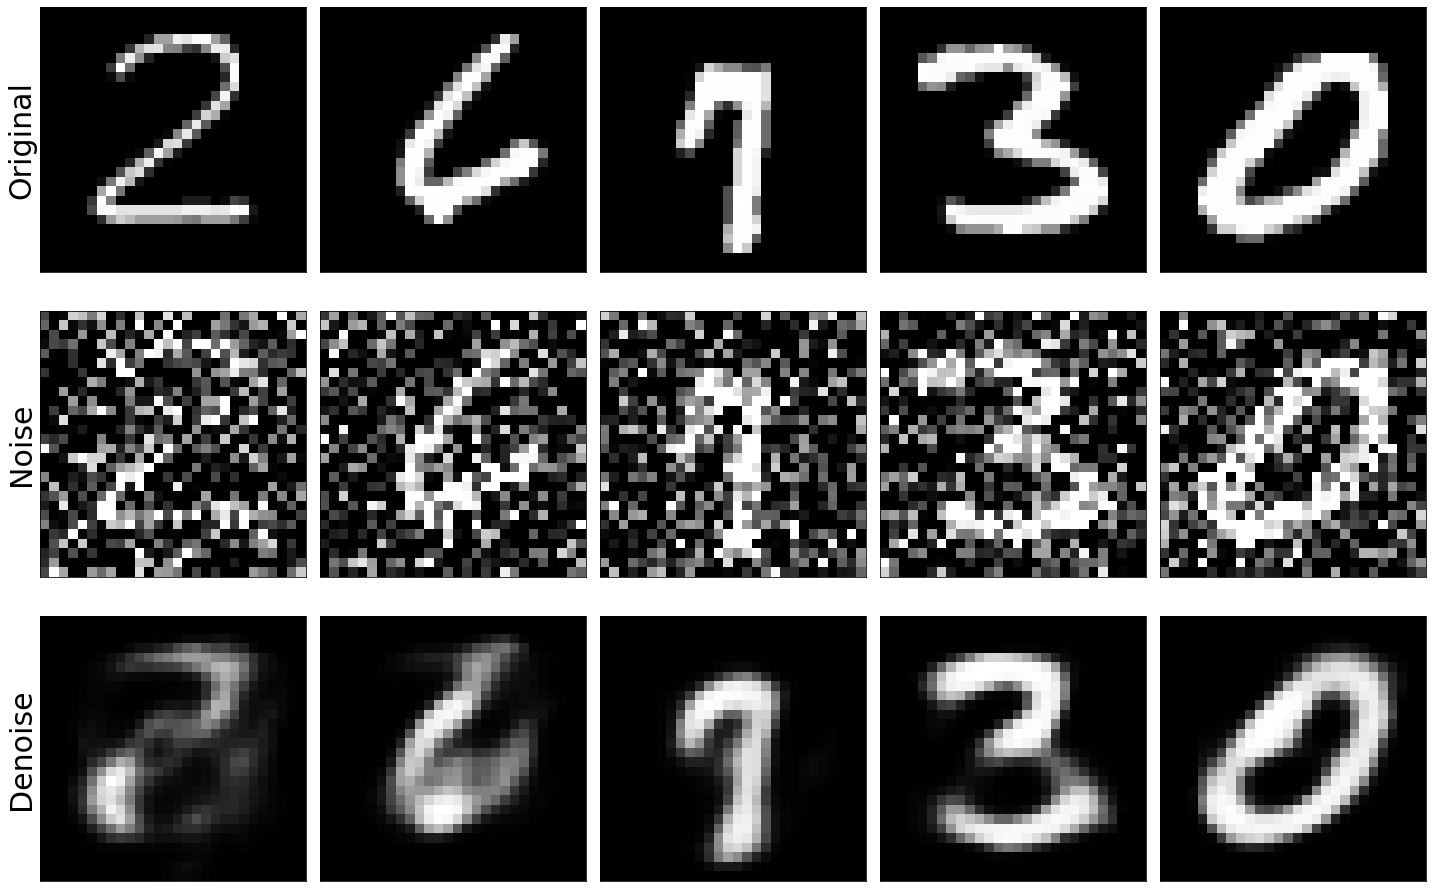

In [47]:
# 한 번 봅시다.

fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10),
      (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20,13))

# 이미지 다섯 개를 무작위로 고른다.
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 입력 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Original", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Noise", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
        
for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoise", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
        
plt.tight_layout()
plt.show()

일부 숫자는 잘 지우지만, 또 일부는 별로네요

### 5.7.1 Denoising with CNN-AutoEncoder

CNN으로 오토인코더의 성능을 끌어올릴 수 있다.

간단하게 히든 레이어에 컨볼루션 레이어를 넣는 것이다.

인코더와 디코더를 모두 컨볼루션 레이어로 바꿔버리자.

In [48]:
from keras.layers import Conv2D

In [49]:
conv_autoencoder = Sequential()

In [50]:
# 인코더 레이어를 추가 합니다.
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', # 패딩을 넣어 사이즈를 같게 한다.
                           input_shape=(28, 28, 1)))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))

In [51]:
# 디코더 레이어를 추가합니다.
# 인코더와 반대로 필터 수를 증가시킵니다.

conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))

In [52]:
# 마지막으로 출력 레이어.

conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [53]:
conv_autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [54]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [55]:
conv_autoencoder.fit(X_train_noisy.reshape(60000, 28, 28, 1),
                     X_train_reshaped.reshape(60000, 28, 28, 1),
                     epochs=10)

Epoch 1/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.1191
Epoch 2/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1038
Epoch 3/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1022
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1013
Epoch 5/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1006
Epoch 6/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.1000
Epoch 7/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0996
Epoch 8/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0991
Epoch 9/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0988
Epoch 10/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0985


In [56]:
output = conv_autoencoder.predict(X_test_noisy.reshape(10000, 28, 28, 1))

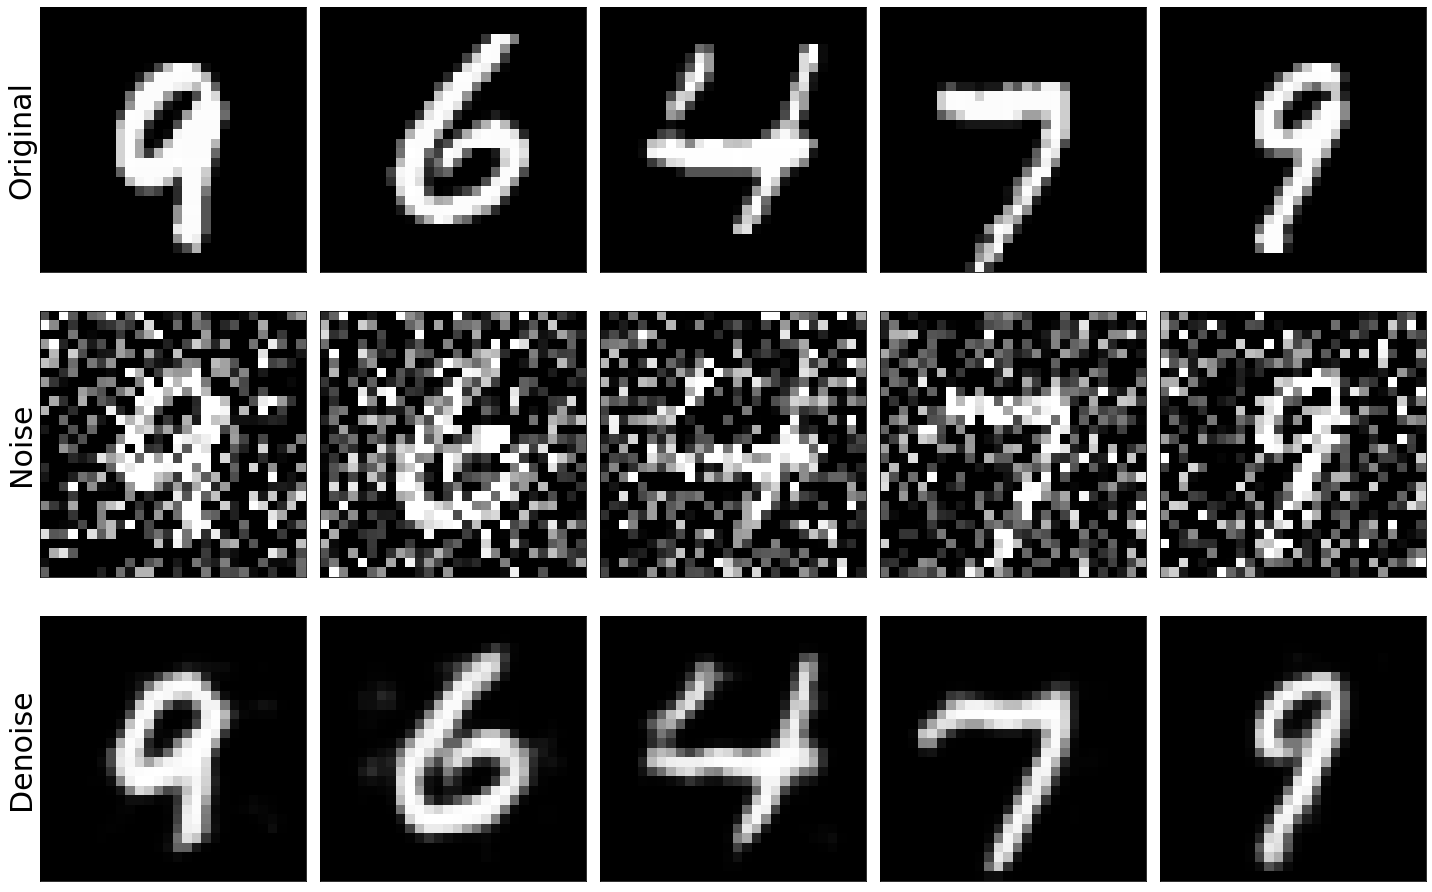

In [57]:
# 한 번 봅시다.

fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10),
      (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20,13))

# 이미지 다섯 개를 무작위로 고른다.
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 입력 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Original", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Noise", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
        
for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoise", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
        
plt.tight_layout()
plt.show()

이전 모델보다 확실히 좋아졌네요!!!

## 5.8 Denoising Documents Noise with AutoEncoder

조금 더 복잡한 데이터셋을 사용해서 실습을 해보겠다고 합니다.

데이터셋은 UCI에서 무료로 제공합니다.

https://archive.ics.uci.edu/ml/machine-learning-databases/00318/NoisyOffice.zip

본 데이터셋에는 사무 문서를 스캔한 것으로 커피 얼룩이나 구겨짐 등 다양한 노이즈가 있습니다.

In [2]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
X_train_noisy = []

for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path+file, color_made='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('floate32')/255
    X_train_noisy.append(img)
    
X_train_noisy = np.array(X_train_noisy)